In [3]:
# !pip install pyshp
# !pip install pyproj

In [4]:
import shapefile  #the pyshp module : Should install pyshp module.
import pandas as pd
from pyproj import Proj, transform  #Should install pyproj module.

In [5]:
# read data (Copy all files from nodelink into nodelink folder: I made it.)
# using old_data
shp_path_node = 'C:/과제\project/정밀관리도/정밀관리도(곽형진)/NLPRK_DPMM-YR201701/GSTN_PMNTN_PT.shp'
sf_node = shapefile.Reader(shp_path_node)
# shp_path_link = './...경로.../MOCT_LINK.shp'
# sf_link = shapefile.Reader(shp_path_link)
# construct pandas dataframe
#grab the shapefile's field names
# node
fields_node = [x[0] for x in sf_node.fields][1:]
records_node = sf_node.records()
shps = [s.points for s in sf_node.shapes()] # node has coordinate data.
# link
# fields_link = [x[0] for x in sf_link.fields][1:]
# records_link = sf_link.records()

#write the records into a dataframe
#node
node_dataframe = pd.DataFrame(columns=fields_node, data=records_node)
#add the coordinate data to a column called "coords"
node_dataframe = node_dataframe.assign(coords=shps)
# link
# link_dataframe = pd.DataFrame(columns=fields_link, data=records_link)

In [6]:
node_dataframe.head()

,OBJECTID,ID_CD,PO_CD,CLASS_CD,SEQNO,SAT_CNT,PDOP,HDOP,VDOP,REC_SEN,USE_YN,ELEVATION,LONGITUDE,LATITUDE,COURSE_ID,coords
0,1,020105010001,0201,0501,0001,12,2.132,1.9539,4.0394,0,1,0.0,127.187131,36.364960,,"[[127.187131131, 36.36496027000004]]"
1,2,020105010002,0201,0501,0002,12,2.131,1.9574,4.0467,0,1,0.0,127.187130,36.364958,,"[[127.18712973200002, 36.36495840300006]]"
2,3,020105010003,0201,0501,0003,12,2.131,1.9609,4.0538,0,1,0.0,127.187129,36.364958,,"[[127.18712947800009, 36.36495808900008]]"
3,4,020105010004,0201,0501,0004,12,1.853,2.0674,3.7644,0,1,0.0,127.187135,36.364967,,"[[127.18713501900004, 36.364967077000074]]"
4,5,020105010005,0201,0501,0005,12,1.852,2.0666,3.7629,0,1,0.0,127.187135,36.364967,,"[[127.18713477900008, 36.36496655900004]]"


In [7]:
node_dataframe.shape

(1121753, 16)

In [12]:
node_dataframe.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [13]:
node_dataframe.COURSE_ID

0            
1            
2            
3            
4            
           ..
1121748    19
1121749    19
1121750    19
1121751    19
1121752    19
Name: COURSE_ID, Length: 1121753, dtype: object

In [14]:
bookhansan=node_dataframe[node_dataframe.ID_CD.str[:4]=='1501']

In [15]:
bookhansan

,OBJECTID,ID_CD,PO_CD,CLASS_CD,SEQNO,SAT_CNT,PDOP,HDOP,VDOP,REC_SEN,USE_YN,ELEVATION,LONGITUDE,LATITUDE,COURSE_ID,coords
707990,0,150105010001,1501,0501,0001,6,5.99,4.78,9.99,0,1,0.000000,126.956719,37.609135,,"[[126.95671906900009, 37.60913485800006]]"
707991,1,150105010002,1501,0501,0002,5,7.31,6.13,13.26,0,1,0.000000,126.956641,37.609272,,"[[126.95664107900006, 37.60927200300006]]"
707992,2,150105010003,1501,0501,0003,5,9.60,6.73,17.98,0,1,0.000000,126.956601,37.609879,,"[[126.95660097200005, 37.60987948200005]]"
707993,3,150105010004,1501,0501,0004,4,9.44,5.14,18.16,0,1,0.000000,126.956601,37.609894,,"[[126.95660096300003, 37.60989444900008]]"
707994,4,150105010005,1501,0501,0005,5,4.55,3.44,8.44,0,1,0.000000,126.956601,37.609947,,"[[126.956600933, 37.60994667700004]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923626,215636,150105039999,1501,0503,9999,8,2.70,1.70,2.20,0,1,672.130005,126.974584,37.631965,1116,"[[126.974663512, 37.631954370000074]]"
923627,215637,150105039999,1501,0503,9999,6,3.00,1.70,2.50,0,1,676.989990,126.974549,37.631981,1116,"[[126.97463108600004, 37.631943368000066]]"
923628,215638,150105039999,1501,0503,9999,10,2.10,1.10,1.80,0,1,674.919983,126.974557,37.631989,1116,"[[126.97461669000006, 37.631945478000034]]"
923629,215639,150105039999,1501,0503,9999,5,3.70,2.10,3.00,0,1,676.419983,126.974552,37.631977,1116,"[[126.97462422600006, 37.63195208600007]]"


In [ ]:
shapefile.Writer(bookhansan, 'bookhansan.shp')

In [14]:
df=pd.read_csv('C:/Users/tripleler/Desktop/등산로.csv')
df.head()

,fid,OBJECTID,ID_CD,PO_CD,CLASS_CD,SEQNO,COURSE_ID,ST_ND_ID,ED_ND_ID,COS_KOR_NM,...,DIFFICULTY,DPLCT_YN,SCTN1_ID,SCTN2_ID,SCTN3_ID,Shape_Leng,RTTDR_YN,SPRNG_NT,INSPECT,AUTUMN_NT
0,1,884,150105040001,1501,504,1,0,667,143,비매칭코스,...,1.42,0,NaN,NaN,NaN,0.005280,0,탐방가능구간,0,탐방가능구간
1,2,885,150105040002,1501,504,2,0,44,667,비매칭코스,...,1.42,0,NaN,NaN,NaN,0.006053,0,탐방가능구간,0,탐방가능구간
2,3,886,150105040003,1501,504,3,88,583,362,우이분소 밑 ~ 구복암위 삼거리,...,1.36,0,NaN,NaN,NaN,0.002847,0,탐방가능구간,0,탐방가능구간
3,4,887,150105040004,1501,504,4,88,752,751,우이분소 밑 ~ 구복암위 삼거리,...,1.36,0,NaN,NaN,NaN,0.013096,0,탐방가능구간,0,탐방가능구간
4,5,888,150105040005,1501,504,5,90,563,289,효자비 ~ 밤골능선삼거리,...,1.30,0,NaN,NaN,NaN,0.001561,0,탐방가능구간,0,탐방가능구간


In [21]:
df.COS_KOR_NM.unique()

array(['비매칭코스', '우이분소 밑 ~ 구복암위 삼거리', '효자비 ~ 밤골능선삼거리',
       '비봉매표소 ~ 비봉능선 ~ 문수봉 ~ 대남문', '삼천사계곡 ~ 사모바위',
       '삼천사계곡입구 ~ 삼천사 ~ 부왕동암문', '산성분소 ~ 보리사', '북한산성입구 ~ 대서문 ~ 위문',
       '등운각 ~ 중성문 ~ 보국문', '북한산성계곡 ~ 대성암 ~ 대남문', '원각사입구 ~ 사패능선',
       '사패산 ~ 사패능선 ~ 포대능선', '송추 ~ 사패능선', '송추폭포입구 ~ 오봉능선',
       '송추 ~ 송추남능선 ~ 오봉능선 ~ 도봉주능선', '통일교 ~ 보문능선 ~ 우이암능선',
       '도봉서원 ~ 거북골 ~ 도봉주능선', '도봉서원 ~ 산정약수', '성불사입구 ~ 천진사',
       '덕제샘 ~ 망월사 ~ 포대능선', '원도봉 ~ 덕제샘 ~ 포대능선', '원도봉 ~ 다락능선 ~ 포대능선',
       '통일교 ~ 도봉대피소 ~ 다락능선', '석굴삼거리 ~ 신선대', '백운대매표소 ~ 하루재 ~ 위문 ~ 백운대',
       '백운매표소 ~ 깔닥고개', '정릉매표소 ~ 보국문', '백련사매표소 ~ 진달래능선 ~ 대동문',
       '용암문매표소 ~ 용암문', '선운교 ~ 옥류교 ~ 소귀천매표소 ~ 대동약수', '광륜사 ~ 은석암',
       '녹야원입구 ~ 다락능선', '성도원하단 ~ 마당바위', '성도원상단 ~ 관음암 ~ 도봉주능선',
       '도봉대피소 ~ 마당바위 ~ 주봉', '포대입구 ~ 도봉주능선 ~ 우이암', '무수골 ~ 원통사 ~ 우이암',
       '우이암매표소 ~ 원통사', '육모정매표소 ~ 육모정고개', '우이암 ~ 우이깔딱고개',
       '강북구 우이동 ~ 장흥면 교현리(우이령길)', '운가사매표소 ~ 진달래능선',
       '아카데미매표소 ~ 구천폭포 ~ 대동문', '위문 ~ 용암문 ~ 대동문 ~ 보국문 ~ 대성문 ~ 대남문',
       '냉골매표소 ~ 

In [22]:
df.shape

(685, 32)

In [2]:
import geopandas as gpd

In [16]:
bookhansan.head()

,OBJECTID,ID_CD,PO_CD,CLASS_CD,SEQNO,SAT_CNT,PDOP,HDOP,VDOP,REC_SEN,USE_YN,ELEVATION,LONGITUDE,LATITUDE,COURSE_ID,coords
707990,0,150105010001,1501,0501,0001,6,5.99,4.78,9.99,0,1,0.0,126.956719,37.609135,,"[[126.95671906900009, 37.60913485800006]]"
707991,1,150105010002,1501,0501,0002,5,7.31,6.13,13.26,0,1,0.0,126.956641,37.609272,,"[[126.95664107900006, 37.60927200300006]]"
707992,2,150105010003,1501,0501,0003,5,9.60,6.73,17.98,0,1,0.0,126.956601,37.609879,,"[[126.95660097200005, 37.60987948200005]]"
707993,3,150105010004,1501,0501,0004,4,9.44,5.14,18.16,0,1,0.0,126.956601,37.609894,,"[[126.95660096300003, 37.60989444900008]]"
707994,4,150105010005,1501,0501,0005,5,4.55,3.44,8.44,0,1,0.0,126.956601,37.609947,,"[[126.956600933, 37.60994667700004]]"


In [17]:
gdf=gpd.points_from_xy(bookhansan.LONGITUDE, bookhansan.LATITUDE)

In [19]:
gdf

<GeometryArray>
 ...
Length: 215641, dtype: geometry

In [20]:
import pyproj
from fiona.crs import from_epsg

In [22]:
bookhansan.drop(['LONGITUDE','LATITUDE'], axis=1)

,OBJECTID,ID_CD,PO_CD,CLASS_CD,SEQNO,SAT_CNT,PDOP,HDOP,VDOP,REC_SEN,USE_YN,ELEVATION,COURSE_ID,coords
707990,0,150105010001,1501,0501,0001,6,5.99,4.78,9.99,0,1,0.000000,,"[[126.95671906900009, 37.60913485800006]]"
707991,1,150105010002,1501,0501,0002,5,7.31,6.13,13.26,0,1,0.000000,,"[[126.95664107900006, 37.60927200300006]]"
707992,2,150105010003,1501,0501,0003,5,9.60,6.73,17.98,0,1,0.000000,,"[[126.95660097200005, 37.60987948200005]]"
707993,3,150105010004,1501,0501,0004,4,9.44,5.14,18.16,0,1,0.000000,,"[[126.95660096300003, 37.60989444900008]]"
707994,4,150105010005,1501,0501,0005,5,4.55,3.44,8.44,0,1,0.000000,,"[[126.956600933, 37.60994667700004]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923626,215636,150105039999,1501,0503,9999,8,2.70,1.70,2.20,0,1,672.130005,1116,"[[126.974663512, 37.631954370000074]]"
923627,215637,150105039999,1501,0503,9999,6,3.00,1.70,2.50,0,1,676.989990,1116,"[[126.97463108600004, 37.631943368000066]]"
923628,215638,150105039999,1501,0503,9999,10,2.10,1.10,1.80,0,1,674.919983,1116,"[[126.97461669000006, 37.631945478000034]]"
923629,215639,150105039999,1501,0503,9999,5,3.70,2.10,3.00,0,1,676.419983,1116,"[[126.97462422600006, 37.63195208600007]]"


In [23]:
gdf = gpd.GeoDataFrame(bookhansan.drop(['LONGITUDE','LATITUDE'], axis=1), geometry=gdf, crs=from_epsg(4326))
#df_cctv_gdf.info()
gdf.head()

C:\anaconda\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,OBJECTID,ID_CD,PO_CD,CLASS_CD,SEQNO,SAT_CNT,PDOP,HDOP,VDOP,REC_SEN,USE_YN,ELEVATION,COURSE_ID,coords,geometry
707990,0,150105010001,1501,0501,0001,6,5.99,4.78,9.99,0,1,0.0,,"[[126.95671906900009, 37.60913485800006]]",POINT (126.95672 37.60913)
707991,1,150105010002,1501,0501,0002,5,7.31,6.13,13.26,0,1,0.0,,"[[126.95664107900006, 37.60927200300006]]",POINT (126.95664 37.60927)
707992,2,150105010003,1501,0501,0003,5,9.60,6.73,17.98,0,1,0.0,,"[[126.95660097200005, 37.60987948200005]]",POINT (126.95660 37.60988)
707993,3,150105010004,1501,0501,0004,4,9.44,5.14,18.16,0,1,0.0,,"[[126.95660096300003, 37.60989444900008]]",POINT (126.95660 37.60989)
707994,4,150105010005,1501,0501,0005,5,4.55,3.44,8.44,0,1,0.0,,"[[126.956600933, 37.60994667700004]]",POINT (126.95660 37.60995)


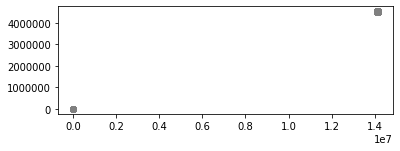

In [24]:
gdf2 = gdf.to_crs(epsg=3857)  #좌표계를 epsg 3857로 변환
gdf2.plot(color='gray')